In [339]:
import numpy as np                 #package for data manipulation, mathematical operations, and statistical calculations.
import pandas as pd                #Pandas offers functionalities for reading and writing data from various file formats, data cleaning, manipulation, aggregation, and visualization#
import scipy                       #library that builds on top of NumPy. It provides a wide range of modules for mathematical algorithms and statistical functions
import seaborn as sns              #It provides a high-level interface for creating attractive and informative statistical graphics.
import matplotlib.pyplot as plt    #Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. It provides a MATLAB-like interface for creating plots and charts
from scipy.stats import skew       #from scipy.stats import skew: This line imports the skew function from the scipy.stats module.
from scipy.stats import zscore     #from scipy.stats import zscore: This line imports the zscore function from the scipy.stats module.



Since the dollar can affect other concurrency the purpose of this data analysis is to investigate whether the same phenomenon applies to cryptocurrencies, particularly Bitcoin (BTC) and Ethereum (ETH) and the goal is to understand the relationship between the movements of these cryptocurrencies.(2015-08-08 - 2021-07-06)

In [340]:
# Raw URL of the Excel file
url = 'https://github.com/Farisos11/Project-/raw/main/data2.xlsx'

# Setting the maximum number of rows to display
pd.options.display.max_rows = None

# Read the Excel file into a Pandas DataFrame 
df = pd.read_excel(url)

#display the dataset
df


,Name,Symbol,Date,BTC_Close_Price,Name.1,Symbol.1,Date.1,ETH_Close_Price
0,Bitcoin,BTC,2015-08-08 23:59:59,260.997009,Ethereum,ETH,2015-08-08 23:59:59,0.753325
1,Bitcoin,BTC,2015-08-09 23:59:59,265.083008,Ethereum,ETH,2015-08-09 23:59:59,0.701897
2,Bitcoin,BTC,2015-08-10 23:59:59,264.470001,Ethereum,ETH,2015-08-10 23:59:59,0.708448
3,Bitcoin,BTC,2015-08-11 23:59:59,270.385986,Ethereum,ETH,2015-08-11 23:59:59,1.067860
4,Bitcoin,BTC,2015-08-12 23:59:59,266.376007,Ethereum,ETH,2015-08-12 23:59:59,1.217440
5,Bitcoin,BTC,2015-08-13 23:59:59,264.079987,Ethereum,ETH,2015-08-13 23:59:59,1.827670
6,Bitcoin,BTC,2015-08-14 23:59:59,265.679993,Ethereum,ETH,2015-08-14 23:59:59,1.827870
7,Bitcoin,BTC,2015-08-15 23:59:59,261.550995,Ethereum,ETH,2015-08-15 23:59:59,1.688900
8,Bitcoin,BTC,2015-08-16 23:59:59,258.506989,Ethereum,ETH,2015-08-16 23:59:59,1.566030
9,Bitcoin,BTC,2015-08-17 23:59:59,257.976013,Ethereum,ETH,2015-08-17 23:59:59,1.203610


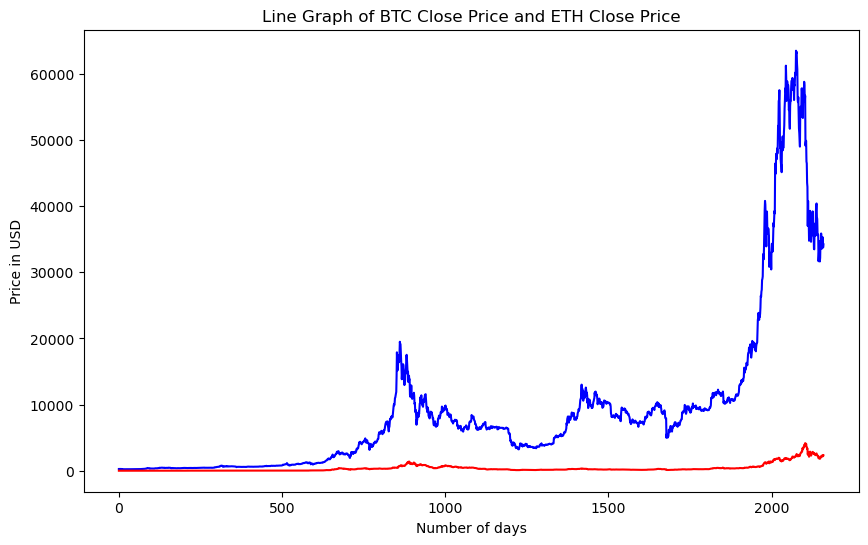

In [341]:
# represnting the dataset 

plt.figure(figsize=(10, 6))

plt.plot(df['BTC_Close_Price'], label='BTC Close Price', color='blue')
plt.plot(df['ETH_Close_Price'], label='ETH Close Price', color='red')

plt.title('Line Graph of BTC Close Price and ETH Close Price')
plt.xlabel('Number of days')
plt.ylabel('Price in USD')

#plt.legend()
#plt.grid(True)
plt.show()


Observing the graph visually reveals the following:

1-Both carencies are price is moving up over time 
2-There was a huge jump around the day 2000 which will case ouliers values 
3-by simple research the huge jump was cased by nes 

In [342]:
selected_columns = ['BTC_Close_Price', 'ETH_Close_Price']   # selecting the colums needed 

#Measures of Location for BTC and ETH

mode_values = df[['BTC_Close_Price', 'ETH_Close_Price']].mode()

mean_values = df[['BTC_Close_Price', 'ETH_Close_Price']].mean()

median_values = df[['BTC_Close_Price', 'ETH_Close_Price']].median()

max_values = df[['BTC_Close_Price', 'ETH_Close_Price']].max()

percentile_80 = df[['BTC_Close_Price', 'ETH_Close_Price']].quantile(0.8)

quartiles= df[['BTC_Close_Price', 'ETH_Close_Price']].quantile([0.25, 0.5, 0.75])




In [343]:
print("Mode:")
print(mode_values)

print("\nMean:")
print(mean_values)

print("\nMedian:")
print(median_values)

print("\nMaximum:")
print(max_values)

print("80th Percentile:")
print(percentile_80)

print("Quartiles:")
print(quartiles)


Mode:
   BTC_Close_Price  ETH_Close_Price
0      1179.969971          11.6528
1      6741.750000          11.9516

Mean:
BTC_Close_Price    9149.309627
ETH_Close_Price     383.910691
dtype: float64

Median:
BTC_Close_Price    6487.960000
ETH_Close_Price     198.643691
dtype: float64

Maximum:
BTC_Close_Price    63503.457930
ETH_Close_Price     4168.701049
dtype: float64
80th Percentile:
BTC_Close_Price    10671.833521
ETH_Close_Price      466.982007
Name: 0.8, dtype: float64
Quartiles:
      BTC_Close_Price  ETH_Close_Price
0.25       973.737747        13.819200
0.50      6487.960000       198.643691
0.75      9730.782041       386.435272


things i have noticed looking at outcomes :
1- The mean tells us that there was a huge increase in the prices to the current 
2- The prices were behaving similarly 

In [344]:
# Measures of Variability

range_values = df[['BTC_Close_Price', 'ETH_Close_Price']].max() - df[['BTC_Close_Price', 'ETH_Close_Price']].min()

# Calculate interquartile range 
interquartile_range = df[['BTC_Close_Price', 'ETH_Close_Price']].quantile(0.75) - df[['BTC_Close_Price', 'ETH_Close_Price']].quantile(0.25)

# Calculate variance (sample) 
variance_sample = df[['BTC_Close_Price', 'ETH_Close_Price']].var()

# Calculate variance (population) 
variance_population = df[['BTC_Close_Price', 'ETH_Close_Price']].var(ddof=0)

# Calculate standard deviation (sample) 
std_dev_sample = df[['BTC_Close_Price', 'ETH_Close_Price']].std()

# Calculate standard deviation (population) 
std_dev_population = df[['BTC_Close_Price', 'ETH_Close_Price']].std(ddof=0)

# Calculate coefficient of variation '
coefficient_of_variation = (std_dev_sample / df[['BTC_Close_Price', 'ETH_Close_Price']].mean()) * 100

# Calculate skewness 
skewness = df[['BTC_Close_Price', 'ETH_Close_Price']].skew()




In [345]:
# Display the results


print("Range:")
print(range_values)
print("\nInterquartile Range:")
print(interquartile_range)
print("\nVariance (Sample):")
print(variance_sample)
print("\nVariance (Population):")
print(variance_population)
print("\nStandard Deviation (Sample):")
print(std_dev_sample)
print("\nStandard Deviation (Population):")
print(std_dev_population)
print("\nCoefficient of Variation:")
print(coefficient_of_variation)
print("\nSkewness:")
print(skewness)


Range:
BTC_Close_Price    63292.962935
ETH_Close_Price     4168.266220
dtype: float64

Interquartile Range:
BTC_Close_Price    8757.044294
ETH_Close_Price     372.616072
dtype: float64

Variance (Sample):
BTC_Close_Price    1.553565e+08
ETH_Close_Price    3.612957e+05
dtype: float64

Variance (Population):
BTC_Close_Price    1.552846e+08
ETH_Close_Price    3.611284e+05
dtype: float64

Standard Deviation (Sample):
BTC_Close_Price    12464.210414
ETH_Close_Price      601.078766
dtype: float64

Standard Deviation (Population):
BTC_Close_Price    12461.324846
ETH_Close_Price      600.939612
dtype: float64

Coefficient of Variation:
BTC_Close_Price    136.231158
ETH_Close_Price    156.567342
dtype: float64

Skewness:
BTC_Close_Price    2.570330
ETH_Close_Price    2.948667
dtype: float64


Note
*skewness is positive, it indicates that the distribution of data is skewed to the right. In other words, the tail of the distribution extends towards higher values, while the majority of the data is concentrated towards lower values.
 


In [346]:
#Measures of Association Between Two Variables

# calculate covariance between BTC and ETH

covariance = df['BTC_Close_Price'].cov(df['ETH_Close_Price'])

# Calculate correlation coefficient between BTC and ETH

correlation_coefficient = df['BTC_Close_Price'].corr(df['ETH_Close_Price'])

print("Covariance between BTC_Close_Price and ETH_Close_Price:", covariance)
print("Correlation Coefficient between BTC_Close_Price and ETH_Close_Price:", correlation_coefficient)

Covariance between BTC_Close_Price and ETH_Close_Price: 6773846.6670653485
Correlation Coefficient between BTC_Close_Price and ETH_Close_Price: 0.9041473285726191


1-Covariance:Positive values indicate a positive relationship between BTC and ETH
2-Correlation Coefficient:Values near +1 indicate a strong positive linear  relationship

In [347]:
# some descriptive statistics not covered in class

# Calculate standard error 
standard_error = std_dev_sample / np.sqrt(len(df))

# Calculate kurtosis 
kurtosis = df[['BTC_Close_Price', 'ETH_Close_Price']].kurtosis()

# Calculate quartile deviation 
quartile_deviation = (df[['BTC_Close_Price', 'ETH_Close_Price']].quantile(0.75) - df[['BTC_Close_Price', 'ETH_Close_Price']].quantile(0.25)) / 2


In [348]:
print("\nStandard Error:")
print(standard_error)
print("\nKurtosis:")
print(kurtosis)
print("\nQuartile Deviation:")
print(quartile_deviation)


Standard Error:
BTC_Close_Price    268.187108
ETH_Close_Price     12.933156
dtype: float64

Kurtosis:
BTC_Close_Price    6.39779
ETH_Close_Price    9.63868
dtype: float64

Quartile Deviation:
BTC_Close_Price    4378.522147
ETH_Close_Price     186.308036
dtype: float64


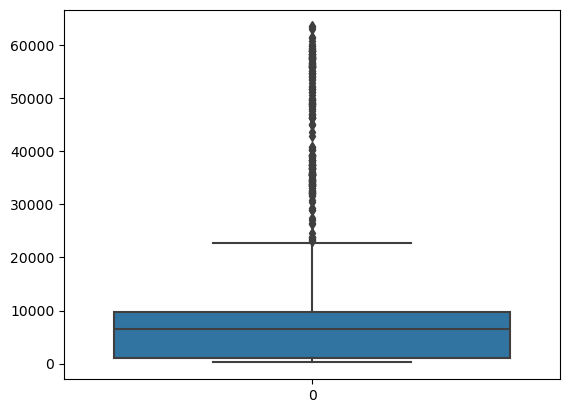

In [349]:
box_plot = sns.boxplot(df['BTC_Close_Price'])


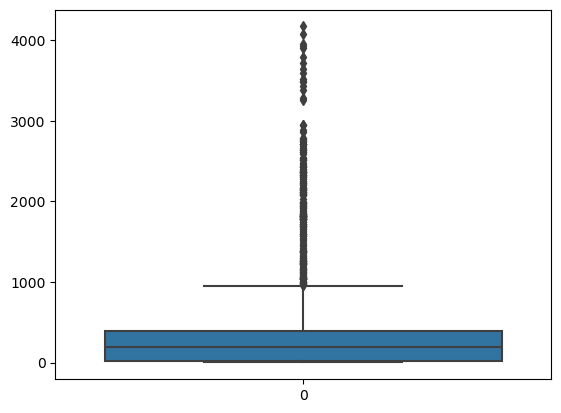

In [350]:
box_plot2 = sns.boxplot(df['ETH_Close_Price'])

explaination:

1-The box in the plot represents the interquartile range (IQR), which is the middle 50% of the data.
2-The whiskers extend from the edges of the box to the minimum and maximum values within a certain distance from the quartiles.
3-Data points that fall outside the whiskers are considered outliers and are plotted individually as points.
4-The line inside the box represents the median, which is the middle value of the dataset)



C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


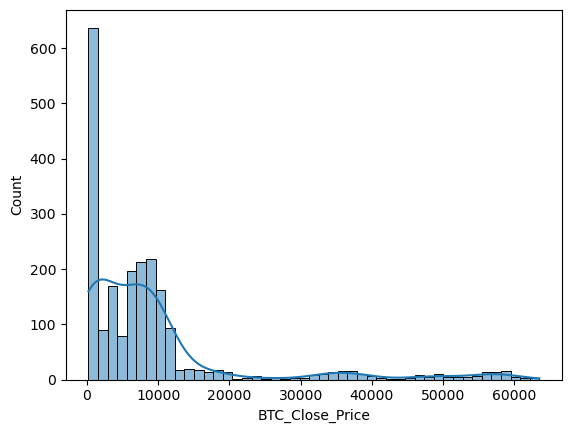

In [351]:
Close_Price_Skewness= sns.histplot(df['BTC_Close_Price'], kde=True)


C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


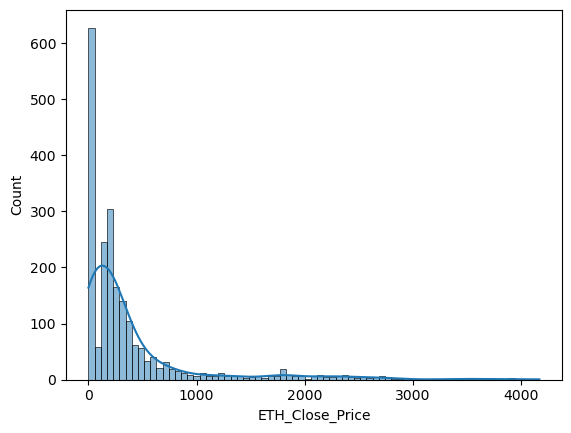

In [352]:
Close_Price2_Skewness= sns.histplot(df['ETH_Close_Price'], kde=True)

BTC and ETH have positive skewness

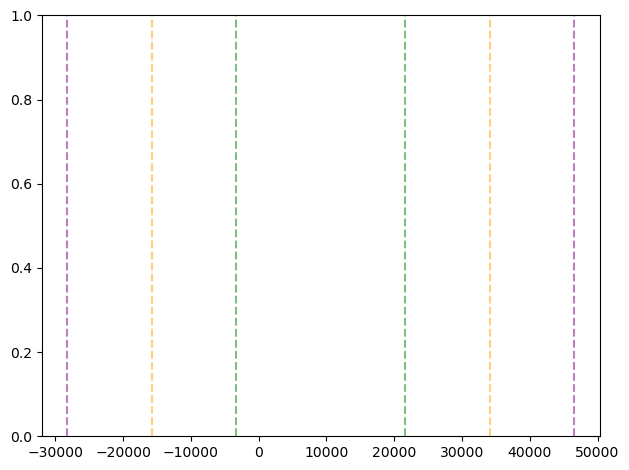

In [353]:
#Empirical Rule
mean = df['BTC_Close_Price'].mean()
std_dev = df['BTC_Close_Price'].std()
plt.axvline(x=mean - std_dev, linestyle='--', color='green', alpha=0.5)  #68% of the data falls within one standard deviation of the mean
plt.axvline(x=mean + std_dev, linestyle='--', color='green', alpha=0.5)
plt.axvline(x=mean - 2 * std_dev, linestyle='--', color='orange', alpha=0.5) # 95% of the data falls within two standard deviations of the mean
plt.axvline(x=mean + 2 * std_dev, linestyle='--', color='orange', alpha=0.5)
plt.axvline(x=mean - 3 * std_dev, linestyle='--', color='purple', alpha=0.5) # 99.7% of the data falls within three standard deviations of the mean
plt.axvline(x=mean + 3 * std_dev, linestyle='--', color='purple', alpha=0.5)

plt.tight_layout()
plt.show()

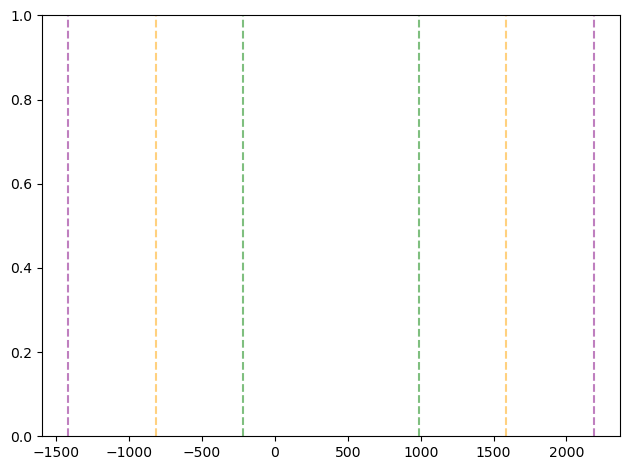

In [354]:
#Empirical Rule
mean = df['ETH_Close_Price'].mean()
std_dev = df['ETH_Close_Price'].std()
plt.axvline(x=mean - std_dev, linestyle='--', color='green', alpha=0.5)
plt.axvline(x=mean + std_dev, linestyle='--', color='green', alpha=0.5)
plt.axvline(x=mean - 2 * std_dev, linestyle='--', color='orange', alpha=0.5)
plt.axvline(x=mean + 2 * std_dev, linestyle='--', color='orange', alpha=0.5)
plt.axvline(x=mean - 3 * std_dev, linestyle='--', color='purple', alpha=0.5)
plt.axvline(x=mean + 3 * std_dev, linestyle='--', color='purple', alpha=0.5)

plt.tight_layout()
plt.show()

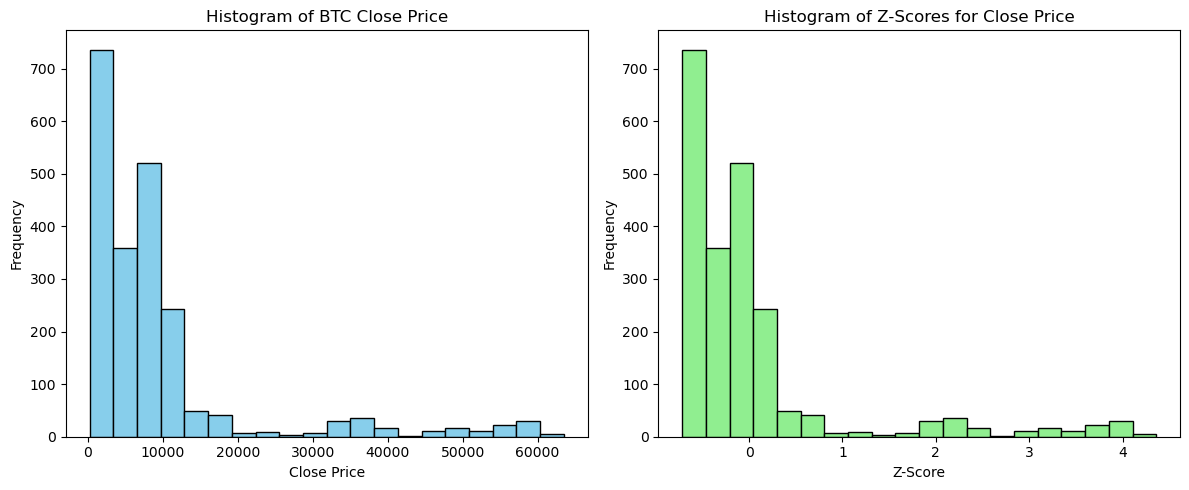

In [361]:
# Visualize the data and z-scores
plt.figure(figsize=(12, 5))

# Histogram of original data (Close Price)
plt.subplot(1, 2, 1)
plt.hist(df['BTC_Close_Price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of BTC Close Price')
plt.xlabel('Close Price')
plt.ylabel('Frequency')

# Histogram of z-scores
plt.subplot(1, 2, 2)
plt.hist(z_scores, bins=20, color='lightgreen', edgecolor='black')
plt.title('Histogram of Z-Scores for Close Price')
plt.xlabel('Z-Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



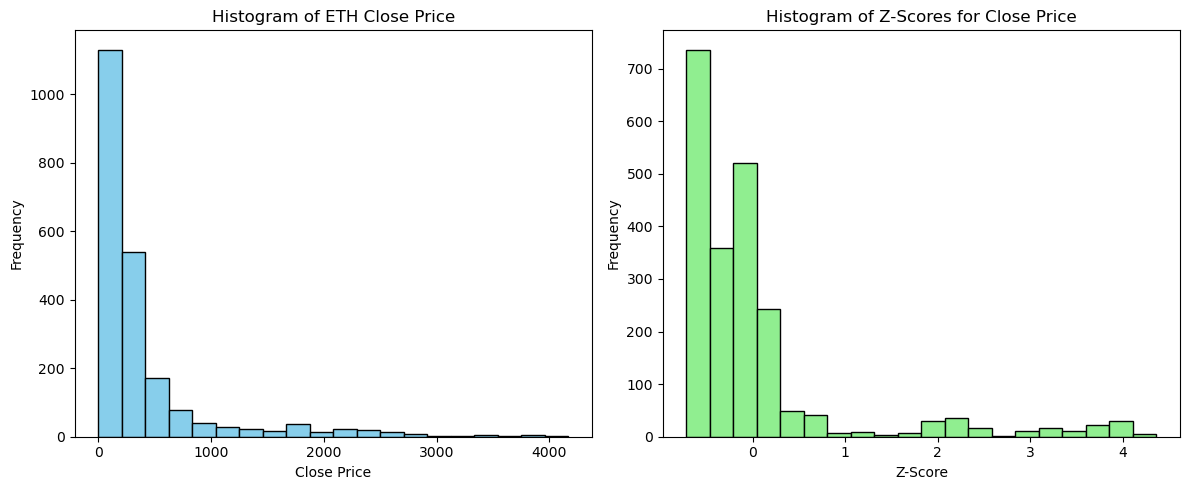

In [362]:
# Visualize the data and z-scores
plt.figure(figsize=(12, 5))

# Histogram of original data (Close Price)
plt.subplot(1, 2, 1)
plt.hist(df['ETH_Close_Price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of ETH Close Price')
plt.xlabel('Close Price')
plt.ylabel('Frequency')

# Histogram of z-scores
plt.subplot(1, 2, 2)
plt.hist(z_scores, bins=20, color='lightgreen', edgecolor='black')
plt.title('Histogram of Z-Scores for Close Price')
plt.xlabel('Z-Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

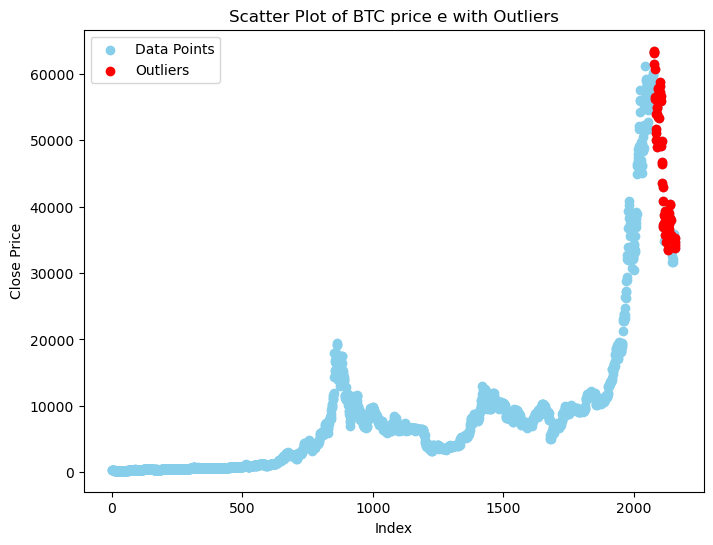

In [357]:
# Detecting outliers
threshold = 3  # Threshold for z-score based detection

outliers = df[np.abs(z_scores) > threshold]['BTC_Close_Price']

# Create a scatter plot to visualize outliers
plt.figure(figsize=(8, 6))
plt.scatter(x=df.index, y=df['BTC_Close_Price'], color='skyblue', label='Data Points')
plt.scatter(x=outliers.index, y=outliers, color='red', label='Outliers')
plt.title('Scatter Plot of BTC price e with Outliers')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

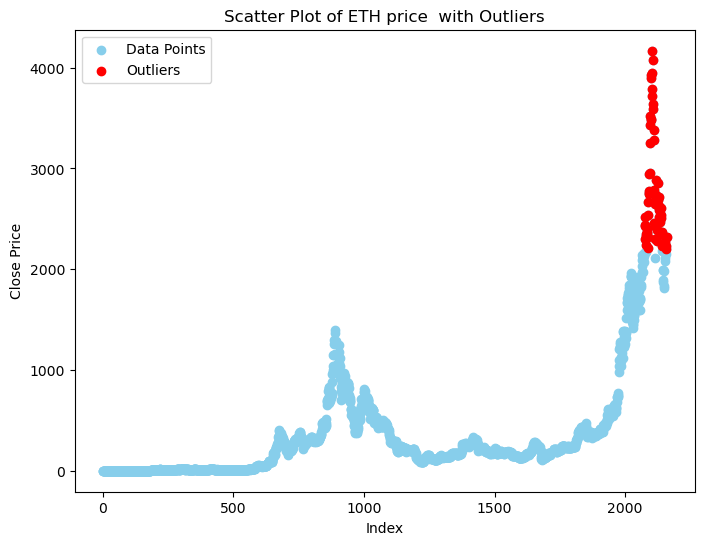

In [358]:
# Detecting outliers
threshold = 3  # Threshold for z-score based detection

outliers = df[np.abs(z_scores) > threshold]['ETH_Close_Price']

# Create a scatter plot to visualize outliers
plt.figure(figsize=(8, 6))
plt.scatter(x=df.index, y=df['ETH_Close_Price'], color='skyblue', label='Data Points')
plt.scatter(x=outliers.index, y=outliers, color='red', label='Outliers')
plt.title('Scatter Plot of ETH price  with Outliers')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()